In [1]:
print("""
@File         : 03_visualizing_data_in_python.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-09-22 11:44:35
@Email        : cuixuanstephen@gmail.com
@Description  : 使用 Python 进行数据可视化
""")


@File         : 03_visualizing_data_in_python.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-09-22 11:44:35
@Email        : cuixuanstephen@gmail.com
@Description  : 使用 Python 进行数据可视化



In [2]:
%cd ../

d:\Data-Analysis-and-Science\EDAPC


In [3]:
import pandas as pd

houseprices_data = pd.read_csv(
    "DATA/HousingPricesData.csv", usecols=["Zip", "Price", "Area", "Room"]
)
houseprices_data.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [4]:
houseprices_data.shape

(924, 4)

In [5]:
houseprices_data.dtypes

Zip       object
Price    float64
Area       int64
Room       int64
dtype: object

In [6]:
houseprices_data['PriceperSqm'] = houseprices_data['Price'].div(houseprices_data['Area'])
houseprices_data.head()

,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


## Visualizing data in Matplotlib

我们在使用 matplotlib 库时通常会遇到的一些重要概念包括：

- `Figure`: 这是绘制图表的框架。简单地说，图形就是绘图已完成。
- `Axes`: 这些是水平线和垂直线（x 轴和 y 轴），为图形提供边框并作为测量的参考。
- `Ticks`: 这些是帮助我们划分轴线的小线.
- `Title`: 这是图表内的图表标题。
- `Labels`: 这些是沿轴刻度的标签。
- `Legend`: 提供有关图表的附加信息以帮助正确解释。

In [7]:
import matplotlib.pyplot as plt

houseprices_sorted = houseprices_data.sort_values("Price", ascending=False)

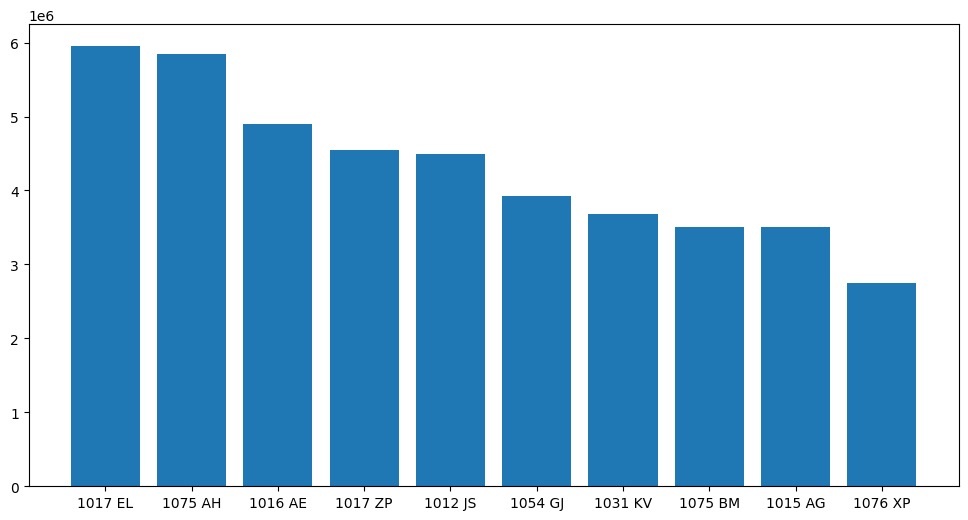

In [8]:
plt.figure(figsize=(12, 6))
x = houseprices_sorted["Zip"].iloc[0:10]
y = houseprices_sorted["Price"].iloc[0:10]
plt.bar(x, y)
plt.show()

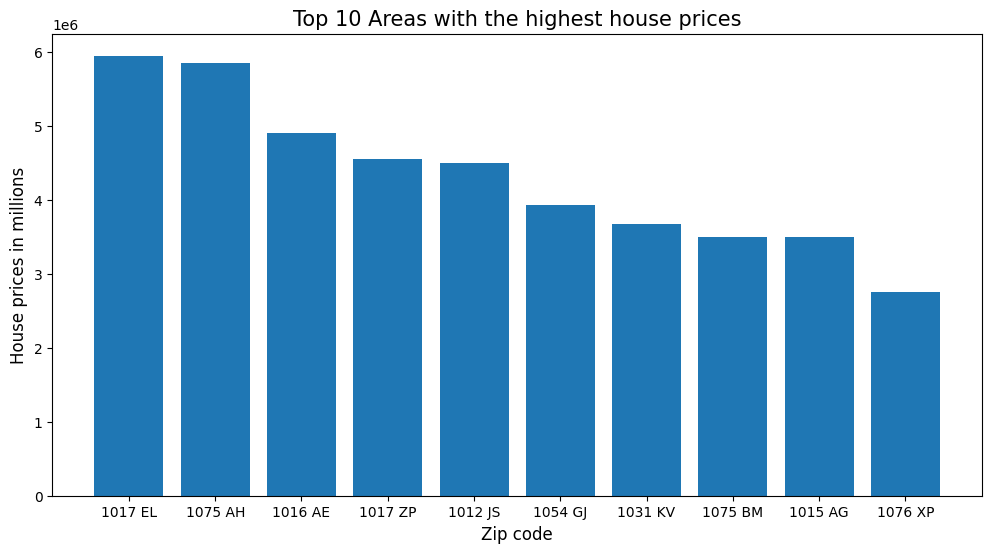

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.title(label="Top 10 Areas with the highest house prices", fontsize=15)
plt.xlabel(xlabel="Zip code", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel(ylabel="House prices in millions", fontsize=12)
plt.yticks(fontsize=10)
plt.show()

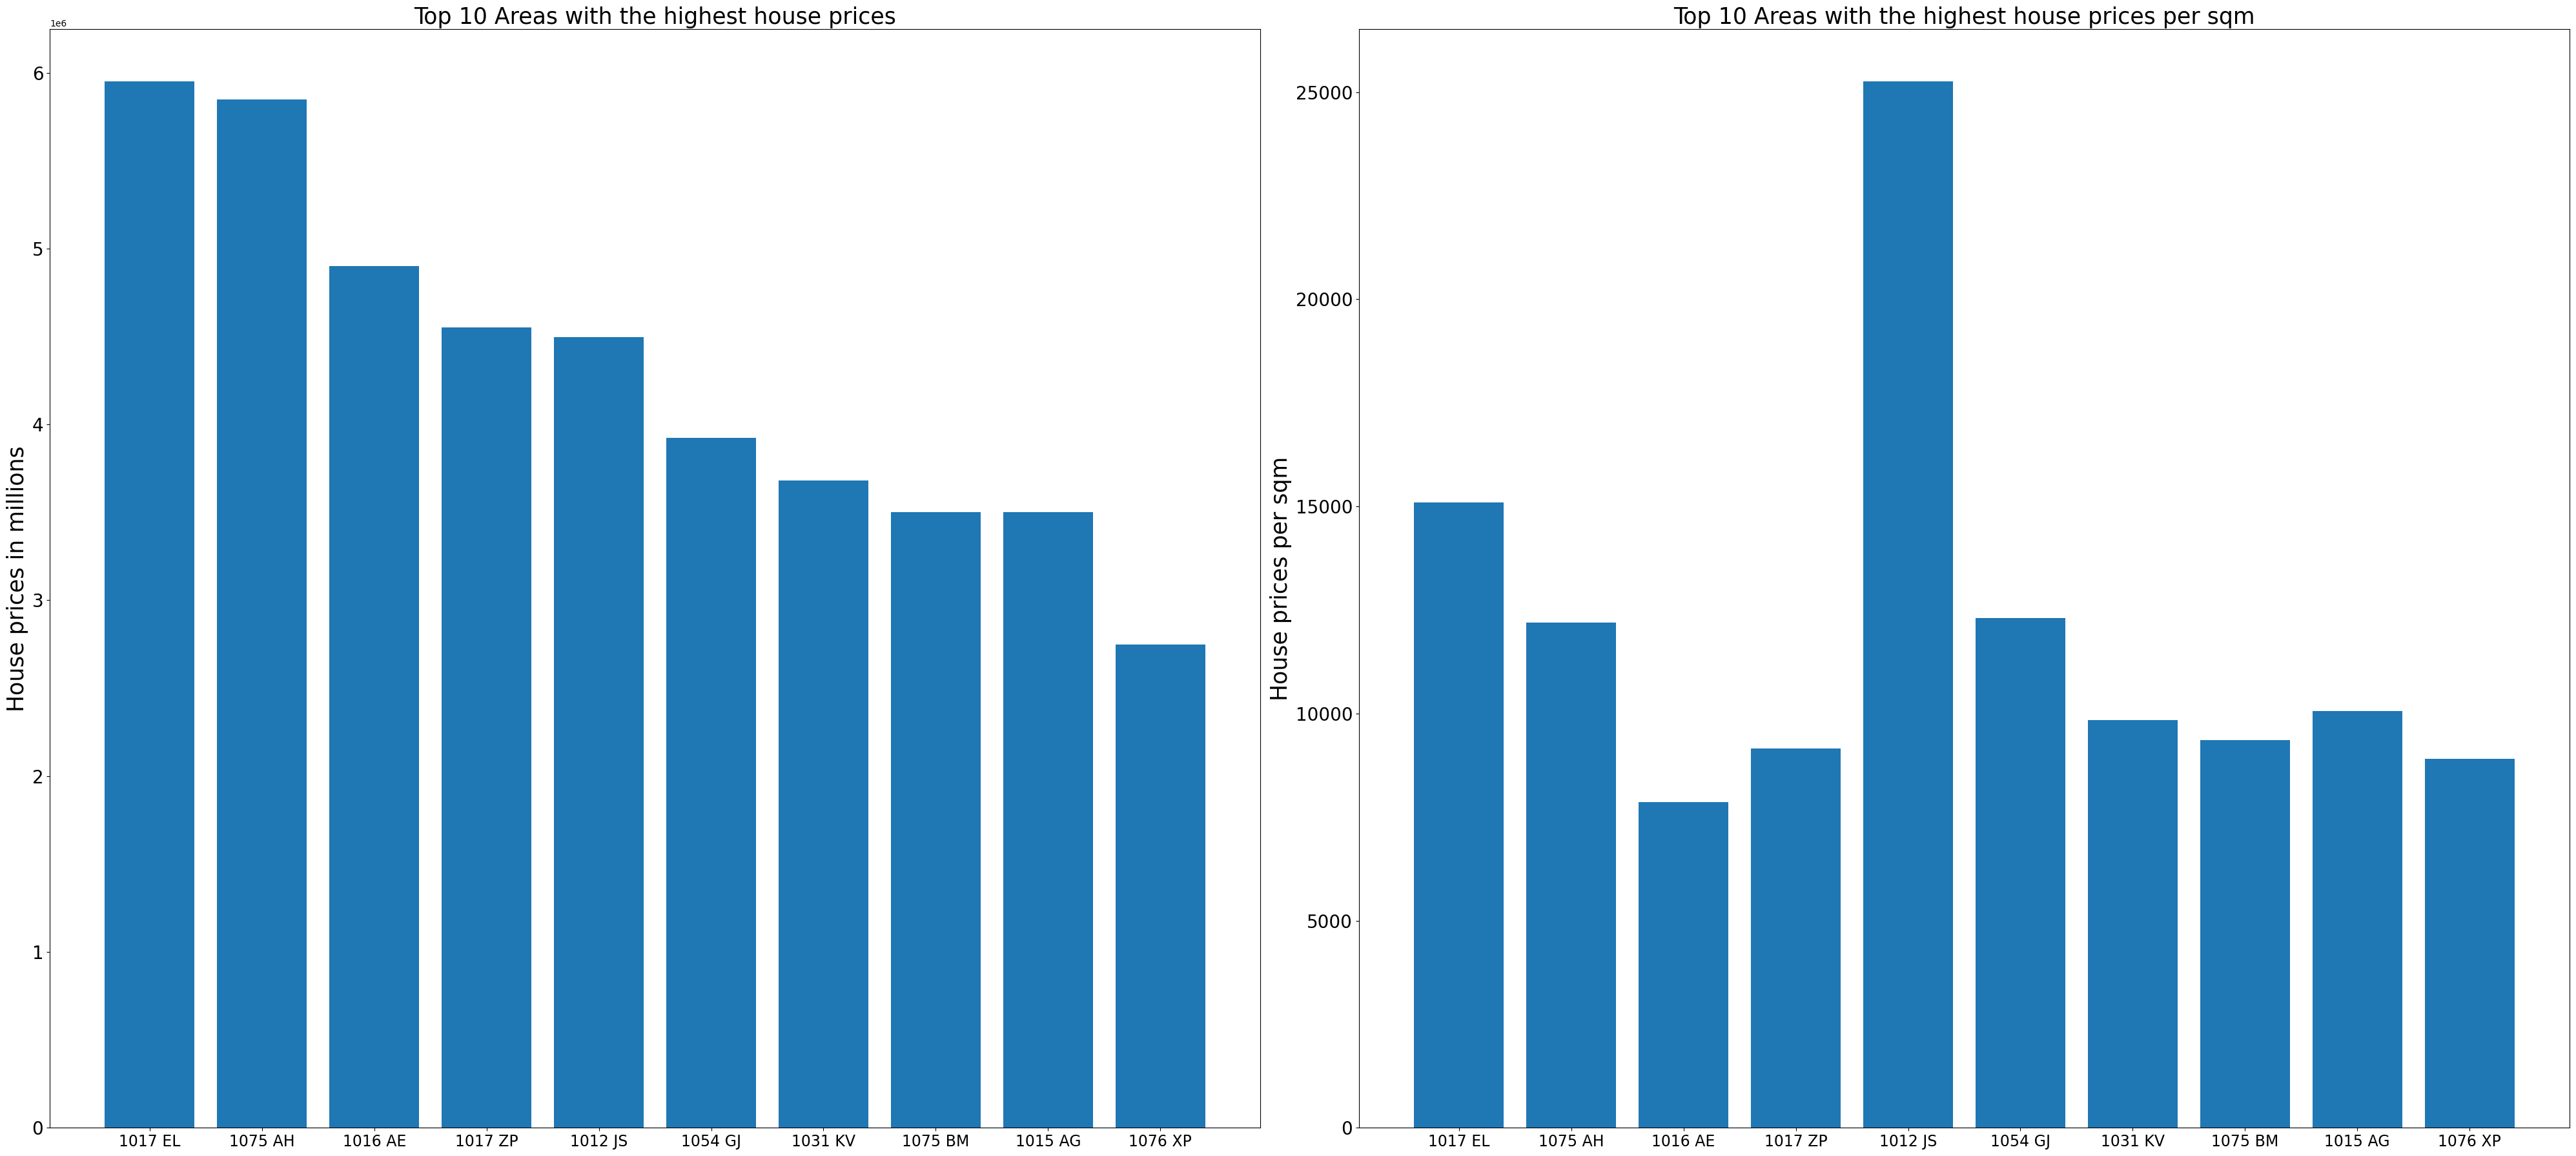

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 18))
y1 = houseprices_sorted["PriceperSqm"].iloc[0:10]

plt.subplot(1, 2, 1)
plt.bar(x, y)
plt.xticks(fontsize=17)
plt.ylabel("House prices in millions", fontsize=25)
plt.yticks(fontsize=20)
plt.title("Top 10 Areas with the highest house prices", fontsize=25)

plt.subplot(1, 2, 2)
plt.bar(x, y1)
plt.xticks(fontsize=17)
plt.ylabel("House prices per sqm", fontsize=25)
plt.yticks(fontsize=20)
plt.title("Top 10 Areas with the highest house prices per sqm", fontsize=25)
plt.tight_layout()
plt.show()

- [Data Visualization using Matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)

## Visualizing data in Seaborn

<Axes: xlabel='Zip', ylabel='Price'>

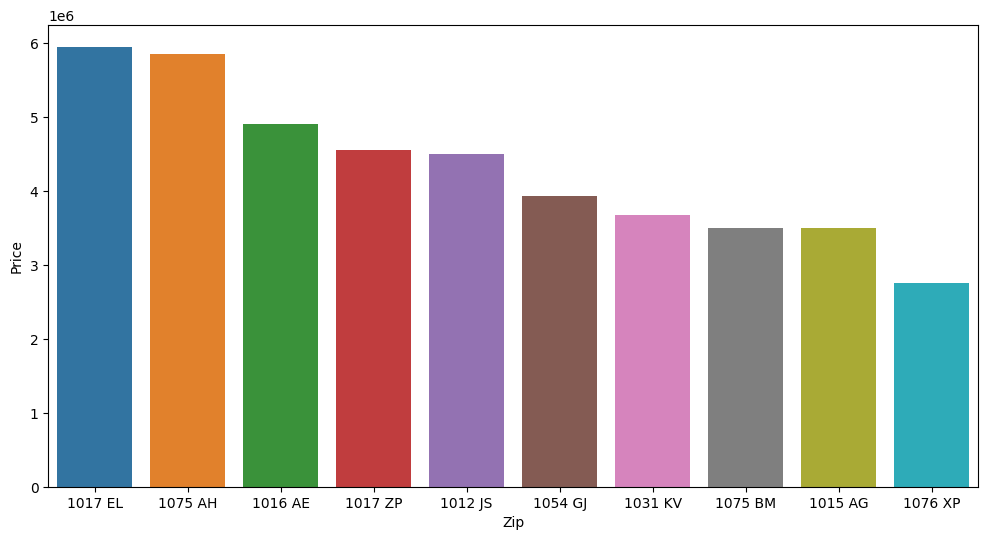

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
data = houseprices_sorted[0:10]
sns.barplot(data=data, x="Zip", y="Price")

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

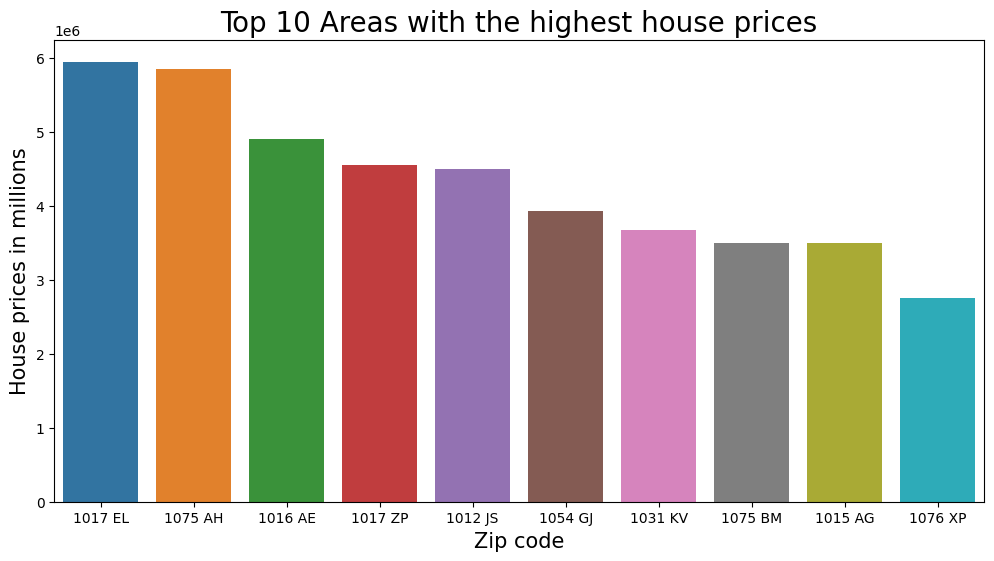

In [12]:
plt.figure(figsize=(12, 6))
data = houseprices_sorted[0:10]
ax = sns.barplot(data=data, x="Zip", y="Price")
ax.set_xlabel("Zip code", fontsize=15)
ax.set_ylabel("House prices in millions", fontsize=15)
ax.set_title("Top 10 Areas with the highest house prices", fontsize=20)

Text(0.5, 1.0, 'Top 10 Areas with the highest house price per sqm')

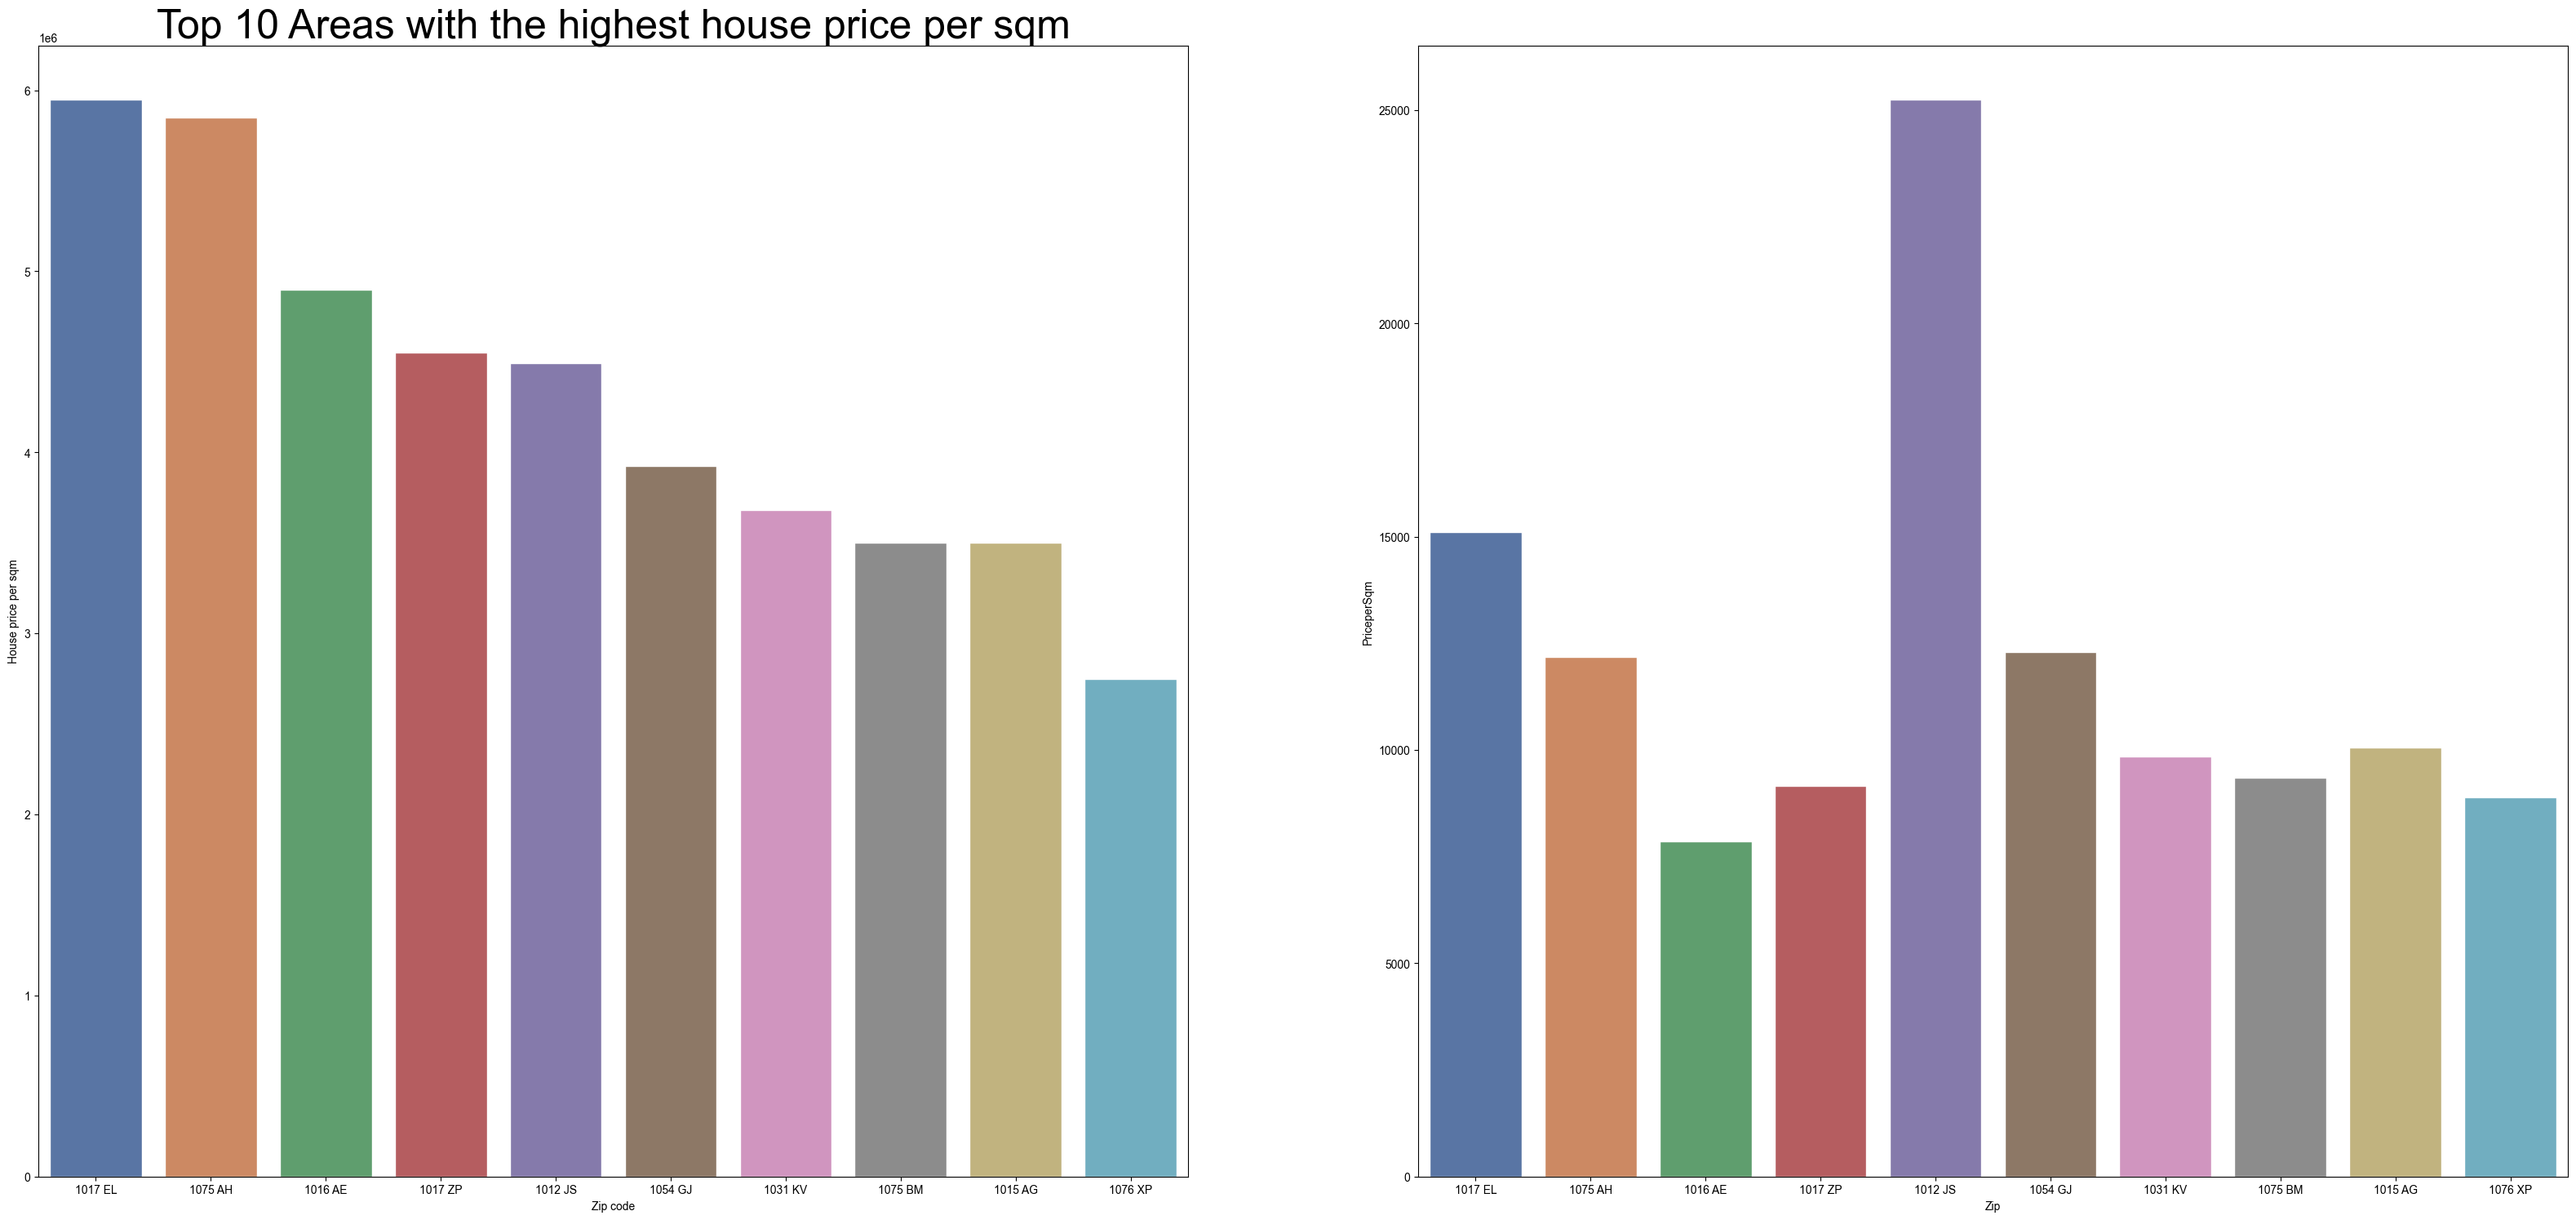

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(40, 18))
sns.set_theme(font_scale=3)
ax1 = sns.barplot(data=data, x="Zip", y="Price", ax=ax[0])
ax1.set_xlabel("Zip code")
ax1.set_ylabel("House prices in millions")
ax1.set_title("Top 10 Areas with the highest house prices")

ax2 = sns.barplot(data=data, x="Zip", y="PriceperSqm", ax=ax[1])
ax1.set_xlabel("Zip code")
ax1.set_ylabel("House price per sqm")
ax1.set_title("Top 10 Areas with the highest house price per sqm")

## Visualizing data in GGPLOT

- `Data`: 这指的是我们计划可视化的数据。
- `Aesthetics`: 这指的是我们想要绘制的变量，即单个变量（x 变量）或多个变量（x 和 y 变量）。
- `Geometric object`: 这指的是我们计划使用的图形。例如直方图或条形图。
- `Facets`: 这有助于我们将数据分解为子集，并在多个方面可视化这些子集
- `Statistical transformations`: 这指的是诸如汇总统计数据之类的转换，例如平均值、中位数等等，对数据执行计算。
- `Coordinates`: 这是指可用的坐标选项。默认笛卡尔坐标。
- `Themes`: 主题提供了关于如何最好地可视化数据的有吸引力的设计选项。这包括背景颜色，图例等等。

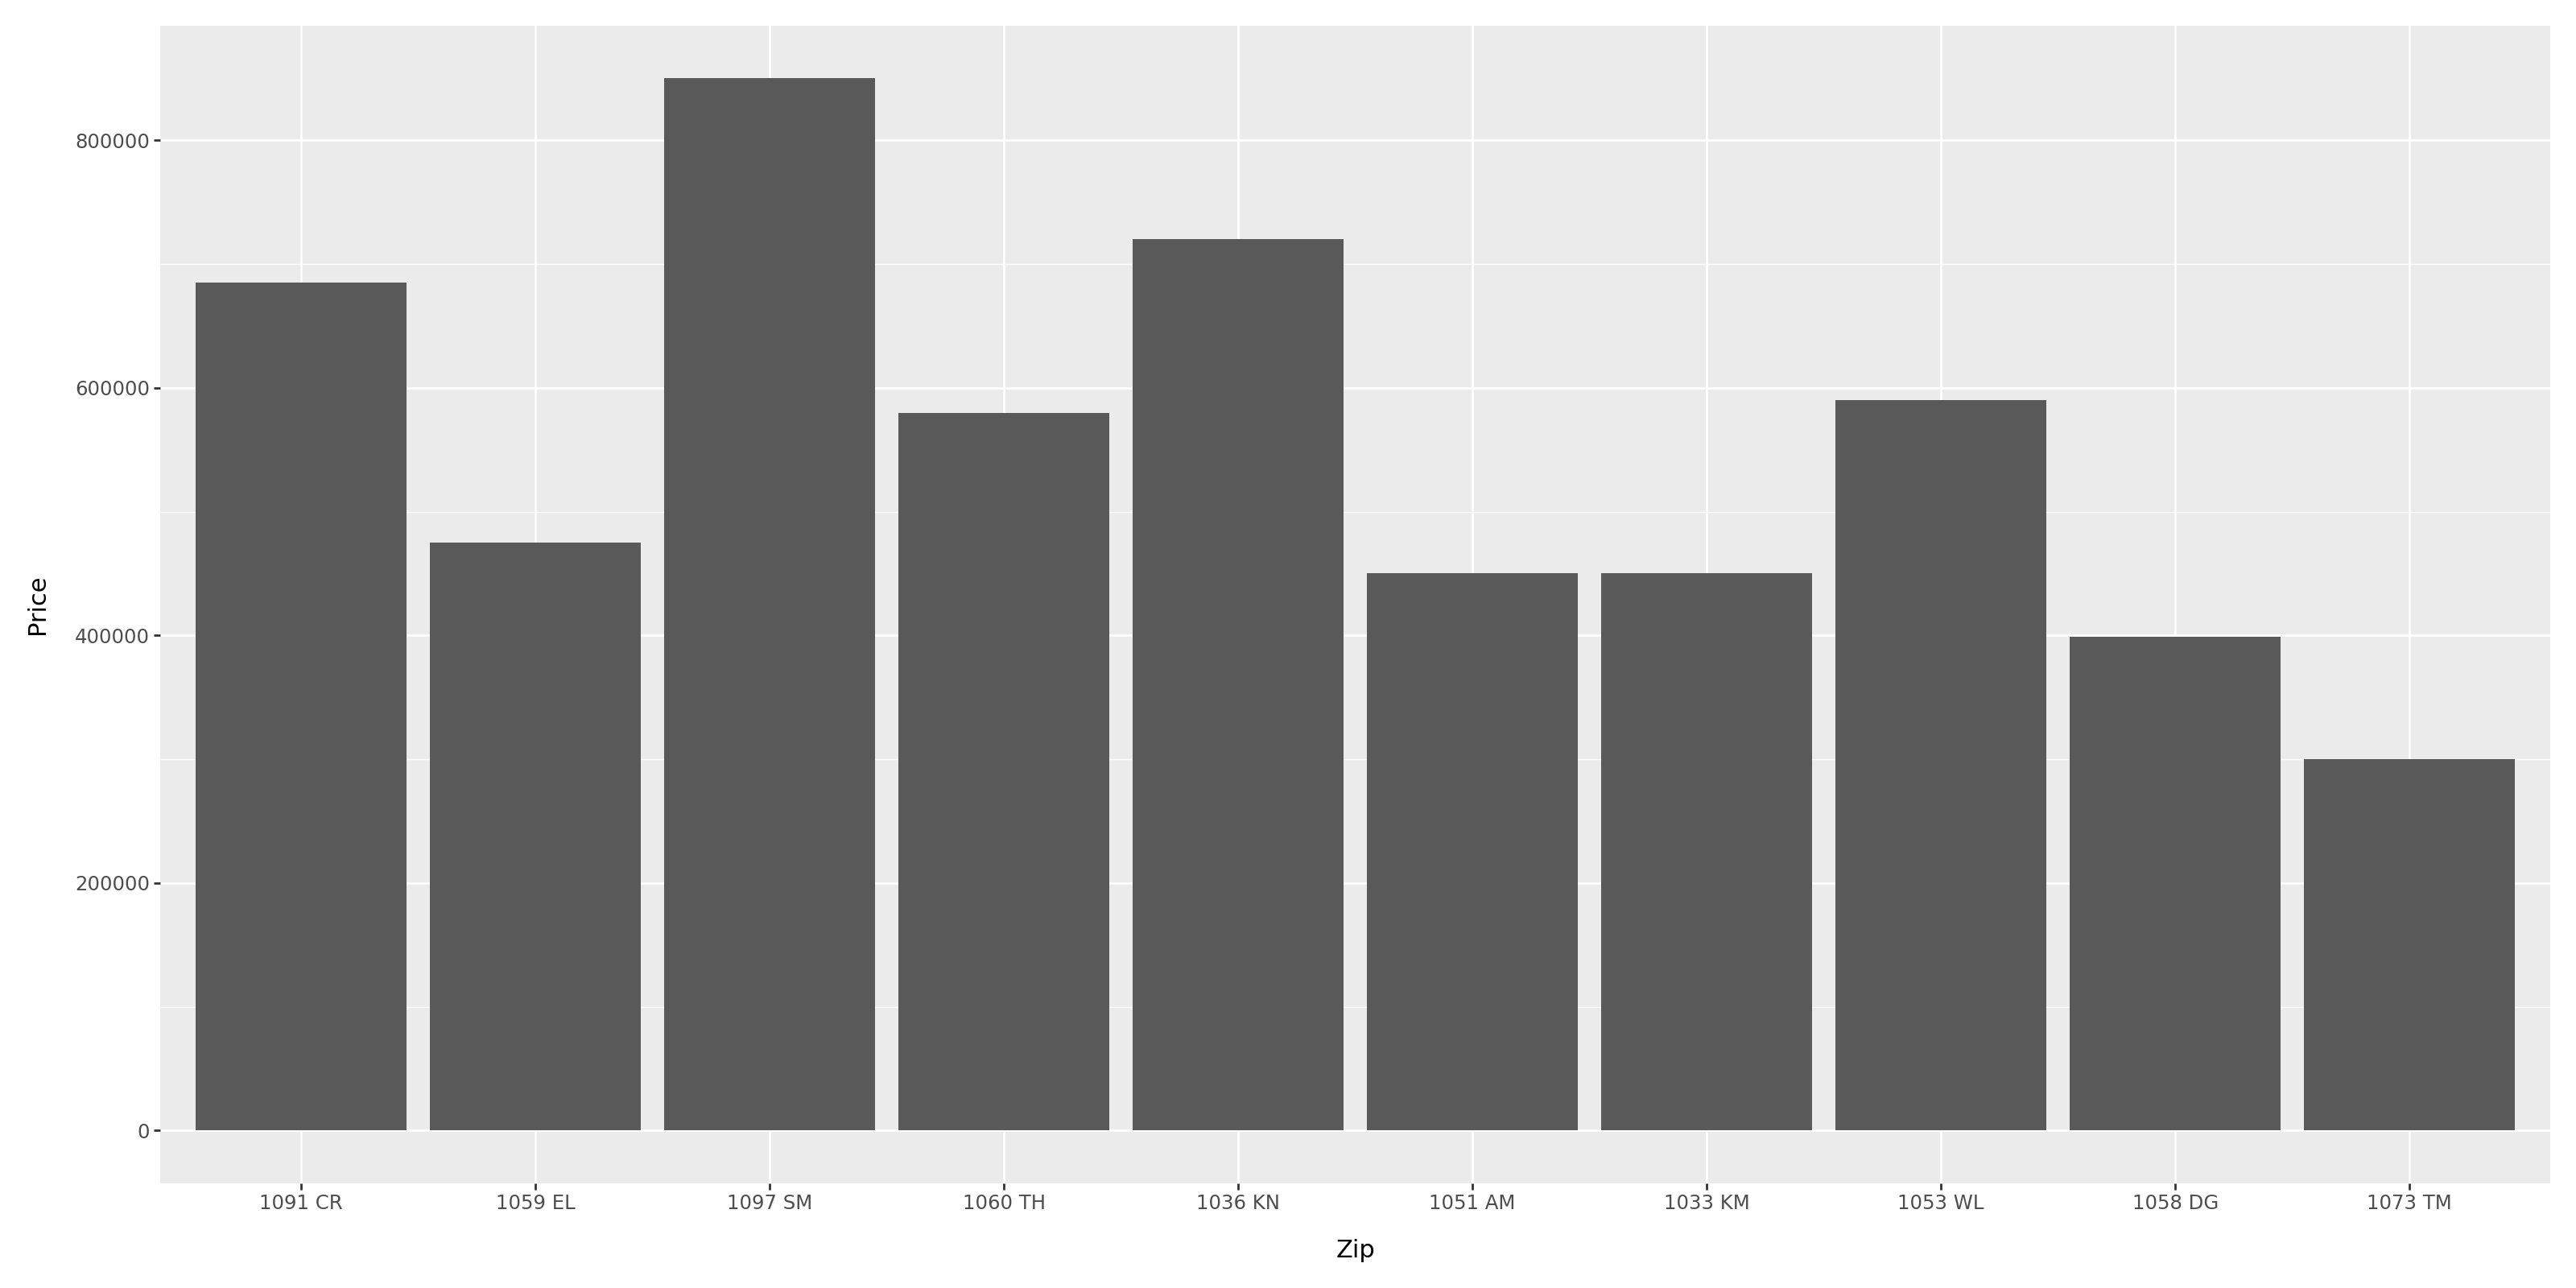

In [15]:
from plotnine import ggplot, aes, geom_bar, scale_x_discrete, theme, labs, element_text

chart_data = houseprices_data[0:10]
(
    ggplot(chart_data, aes(x="Zip", y="Price"))
    + geom_bar(stat="identity")
    + scale_x_discrete(limits=chart_data["Zip"].tolist())
    + theme(figure_size=(16, 8))
)

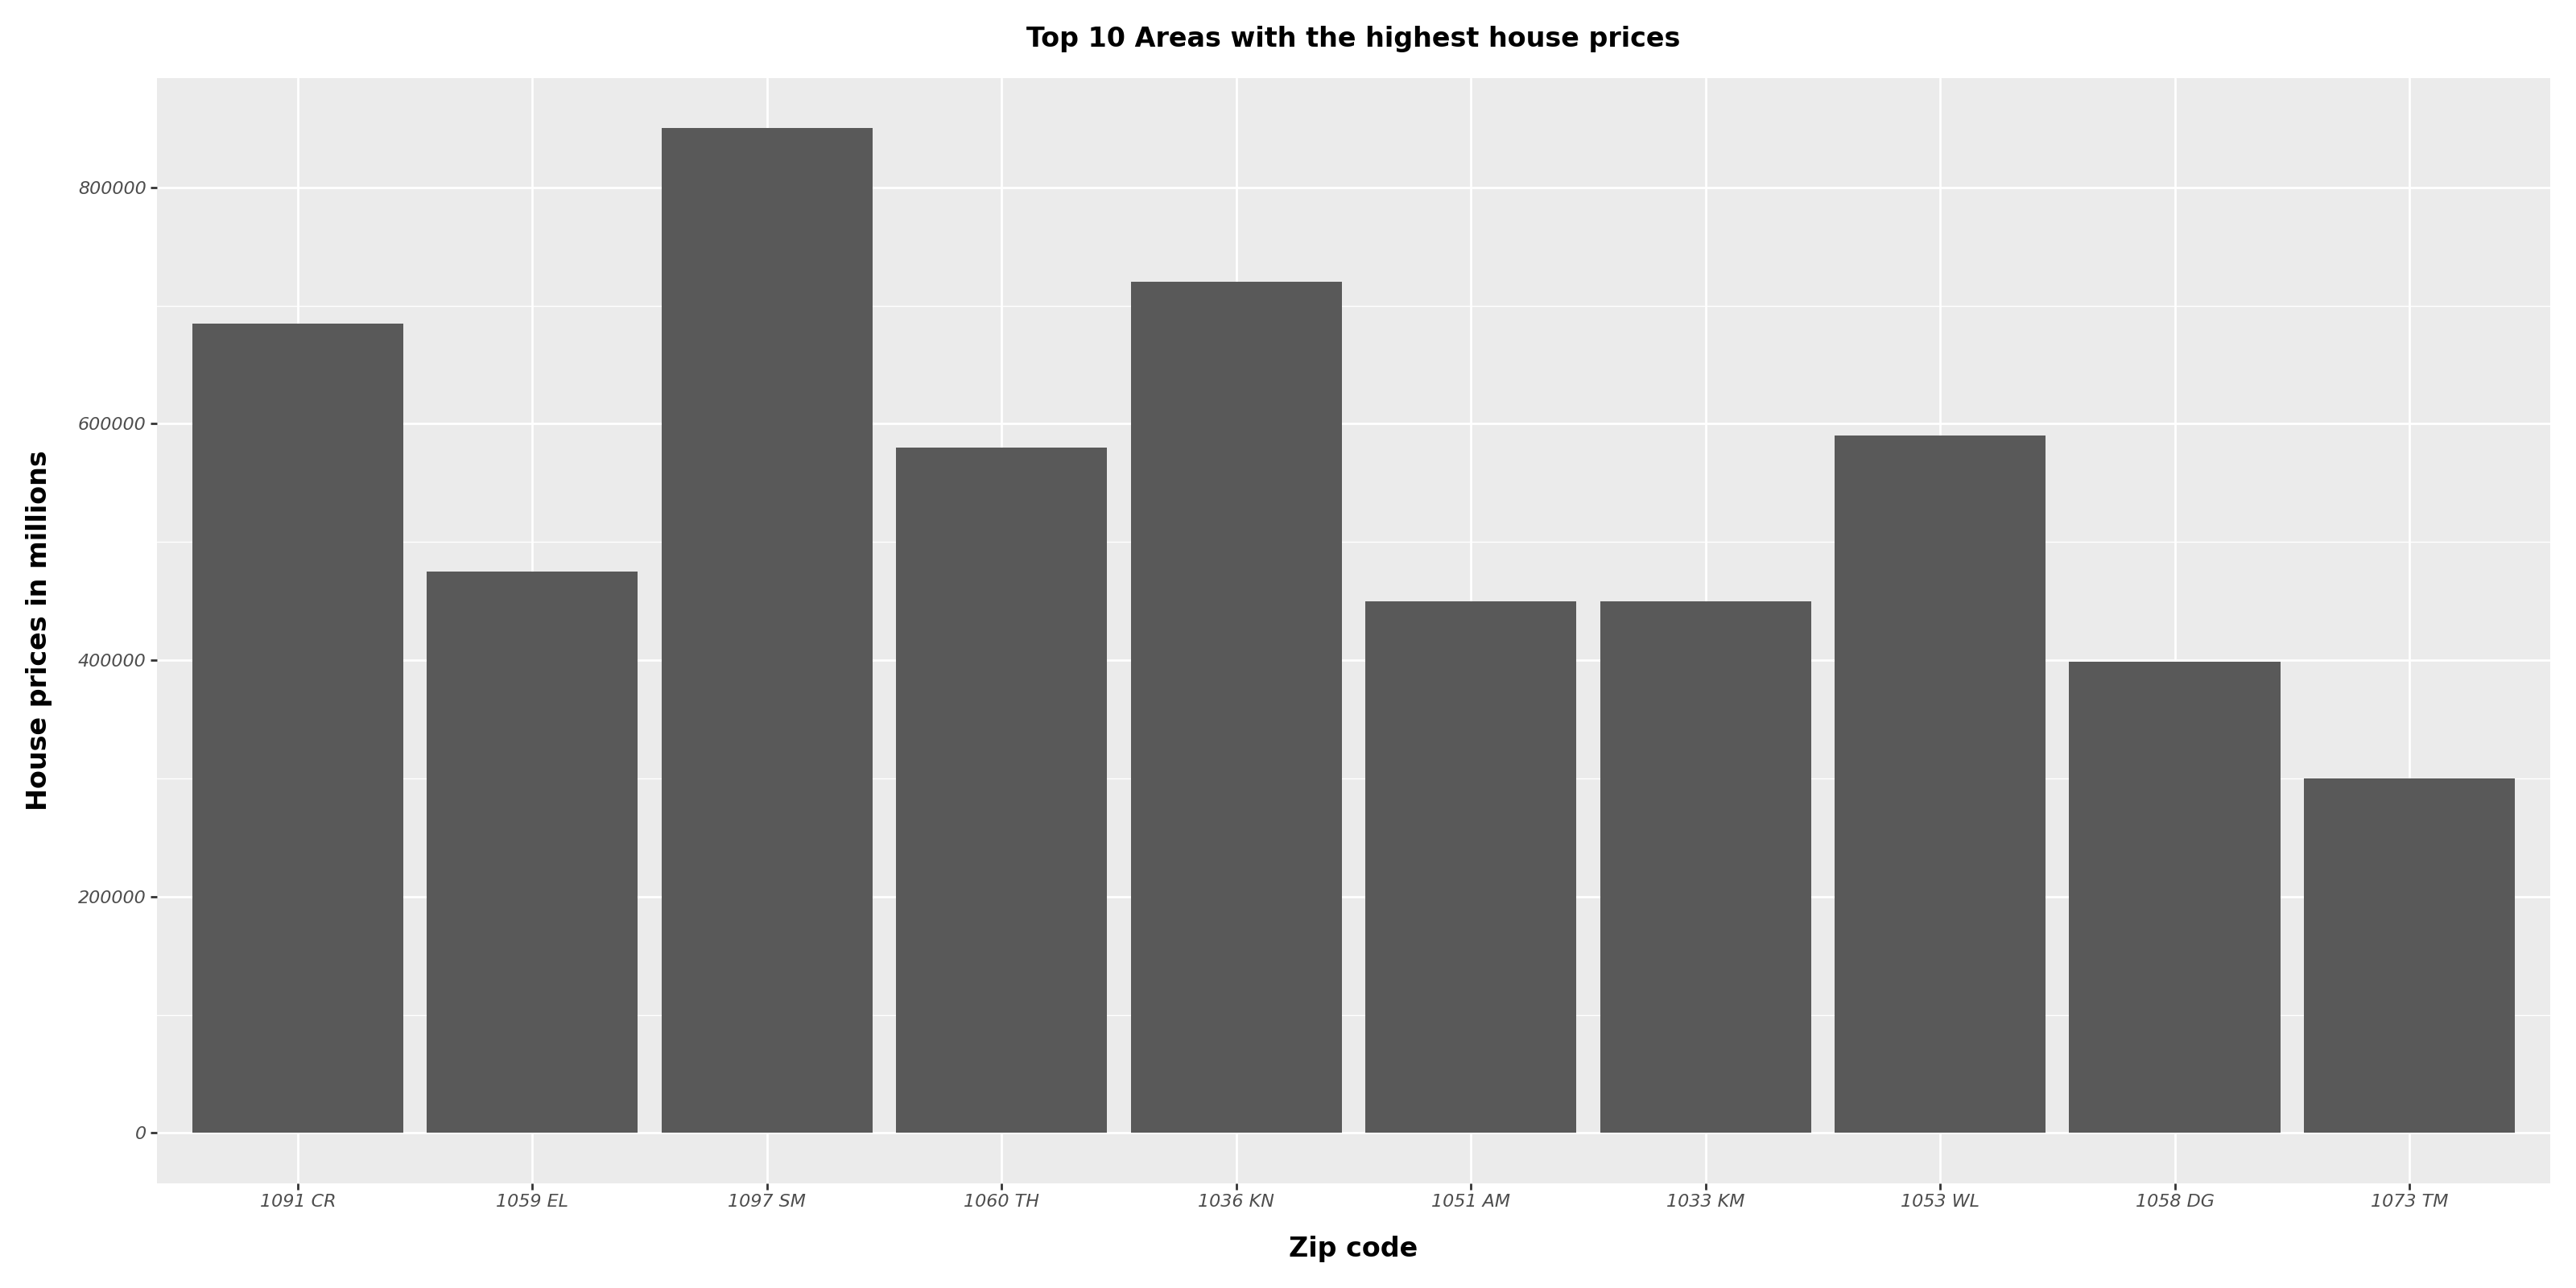

In [16]:
(
    ggplot(chart_data, aes(x="Zip", y="Price"))
    + geom_bar(stat="identity")
    + labs(
        y="House prices in millions",
        x="Zip code",
        title="Top 10 Areas with the highest house prices",
    )
    + scale_x_discrete(limits=chart_data["Zip"].tolist())
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(face="bold", size=12),
        axis_text=element_text(face="italic", size=8),
        plot_title=element_text(face="bold", size=12),
    )
)

- [Data Visualization using Plotnine and ggplot2 in Python](https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/)

## Visualizing data in Bokeh

In [17]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [18]:
data = houseprices_sorted[0:10]
fig = figure(x_range=data["Zip"], plot_width=700, plot_height=500)
fig.vbar(x=data["Zip"], top=data["Price"], width=0.9)
show(fig)


In [19]:
fig = figure(
    x_range=data["Zip"],
    plot_width=700,
    plot_height=500,
    # Addition information
    title="Top 10 Areas with the highest house prices",
    x_axis_label="Zip code",
    y_axis_label="House prices in millions",
)
fig.vbar(x=data["Zip"], top=data["Price"], width=0.9)
fig.xaxis.axis_label_text_font_size = "15pt"
fig.xaxis.major_label_text_font_size = "10pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "10pt"
fig.title.text_font_size = "15pt"
show(fig)

In [20]:
p1 = figure(
    x_range=data["Zip"],
    plot_width=480,
    plot_height=400,
    title="Top 10 Areas with the highest house prices",
    x_axis_label="zip code",
    y_axis_label="House prices in millions",
)
p1.vbar(x=data["Zip"], top=data["Price"], width=0.9)
p2 = figure(
    x_range=data["Zip"],
    plot_width=480,
    plot_height=400,
    title="Top 10 Areas with the highest house prices per sqm",
    x_axis_label="Zip code",
    y_axis_label="House prices per sqm",
)
p2.vbar(x=data["Zip"], top=data["PriceperSqm"], width=0.9)
gp = bk_plot.gridplot(children=[[p1, p2]])
bk_plot.show(gp)